# Global Carbon Budget: Fossil Fuel and Cement Production

In [1]:
%matplotlib inline

In [2]:
import math

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

from pandas_datapackage_reader import read_datapackage

Let's load the global fossil fuel and cement production emissions data from the [Global Carbon Budget](http://www.globalcarbonproject.org/carbonbudget/index.htm). It has been pre-processed for easy reading in as a [data package](https://github.com/openclimatedata/global-carbon-budget).

In [3]:
ffc = read_datapackage("https://github.com/openclimatedata/global-carbon-budget", "fossil-fuel-cement")

In [4]:
ffc.head()

,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita,Source
Year,,,,,,,,
1959,2454,1382,789,206,40,36,0.83,CDIAC
1960,2569,1410,849,227,43,39,0.85,CDIAC
1961,2580,1349,904,240,45,42,0.84,CDIAC
1962,2686,1351,980,263,49,44,0.86,CDIAC
1963,2833,1396,1052,286,51,47,0.89,CDIAC


Conversion to Gt and to tonnes CO$_2$ instead of tonnes C.

In [5]:
ffc_Gt_CO2 = ffc[["Total", "Coal", "Oil", "Gas", "Cement", "Flaring"]] * 3.664 / 1000

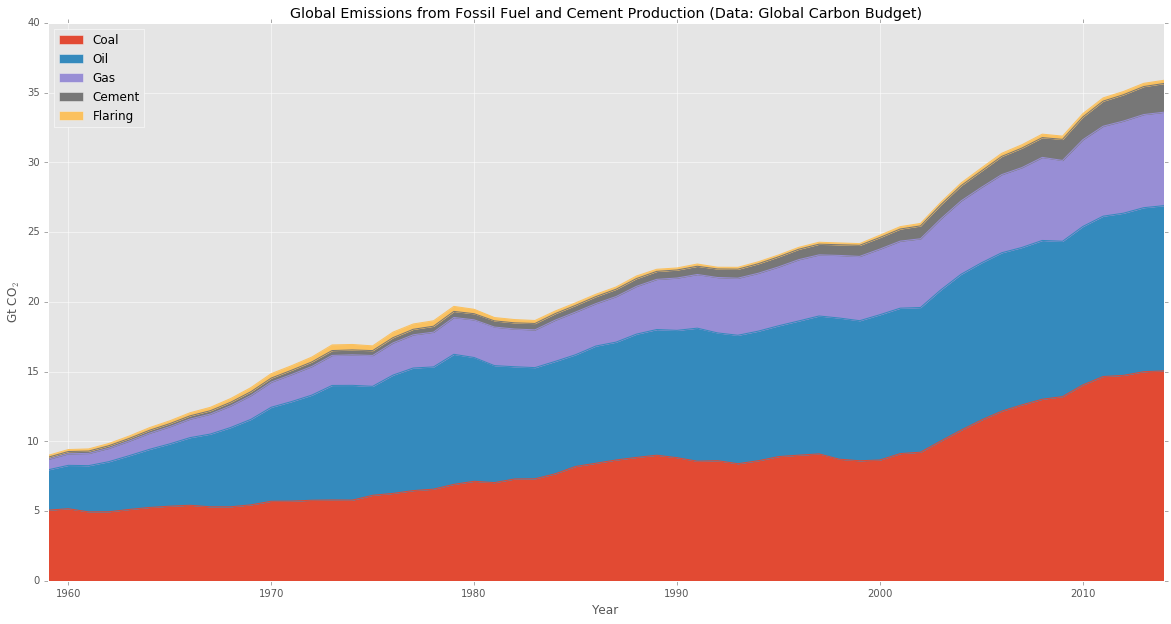

In [6]:
ffc_Gt_CO2[["Coal", "Oil", "Gas", "Cement", "Flaring"]].plot.area(stacked=True)
plt.title("Global Emissions from Fossil Fuel and Cement Production (Data: Global Carbon Budget)")
plt.ylabel("Gt CO$_2$")

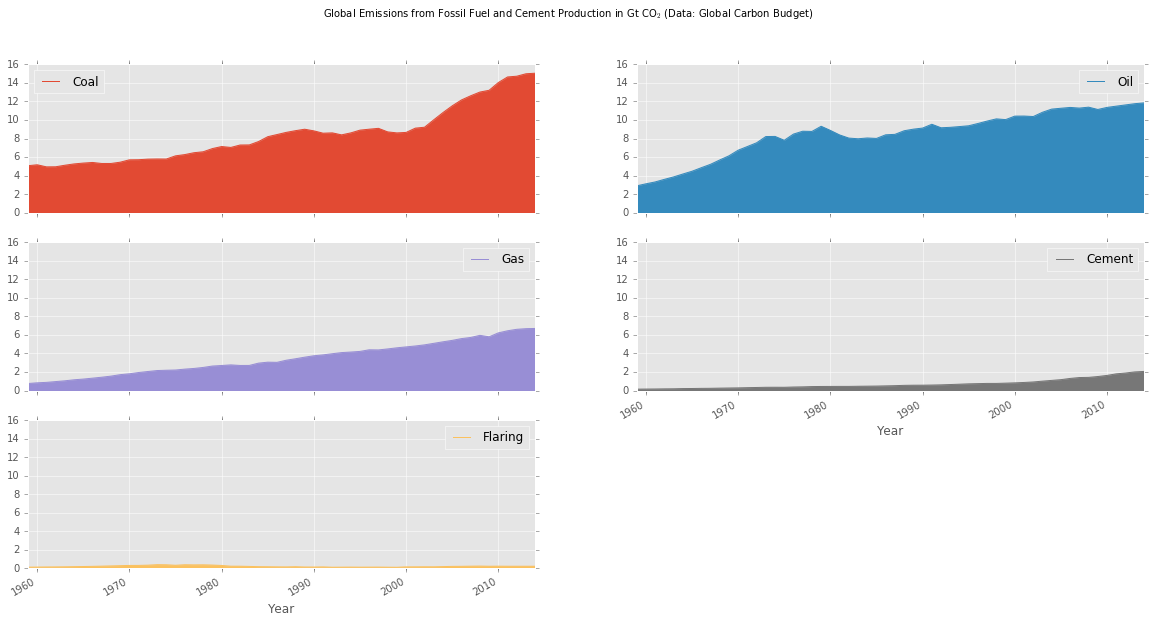

In [7]:
subcategories = ffc_Gt_CO2[["Coal", "Oil", "Gas", "Cement", "Flaring"]] 
ymax = math.ceil(subcategories.max(axis=1).max())
axes = subcategories.plot.area(subplots=True, layout=(3,2), ylim=(0, ymax))
plt.suptitle("Global Emissions from Fossil Fuel and Cement Production in Gt CO$_2$ (Data: Global Carbon Budget)")

Per-Capita emissions converted to t CO$_2$ per person per year.

In [8]:
per_capita_CO2 = ffc["Per Capita"] * 3.664

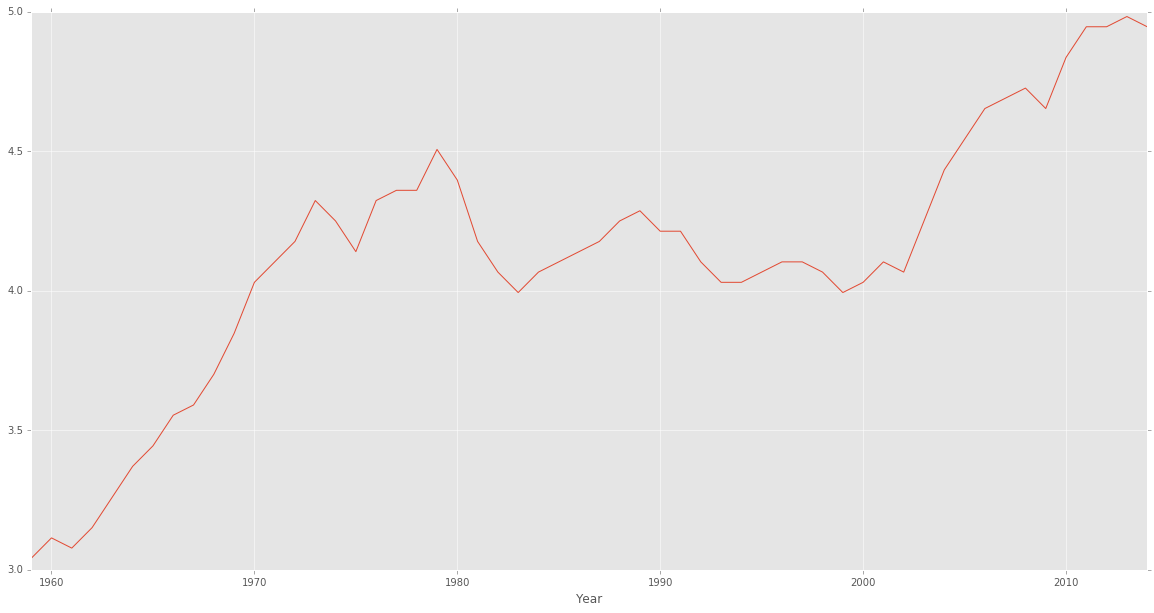

In [9]:
per_capita_CO2.plot()

Let's pull in a [population data package](https://github.com/datasets/population) to have a look at the population growth.

In [10]:
population = read_datapackage("https://github.com/datasets/population")

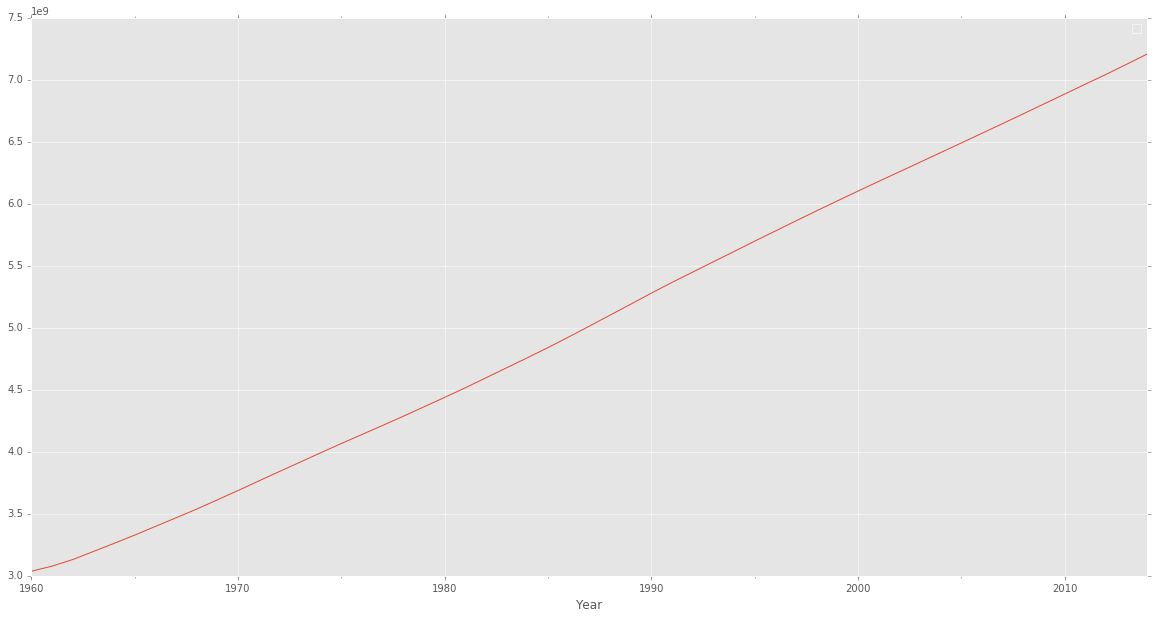

In [11]:
population[population["Country Name"] == "World"][["Year", "Value"]].set_index("Year").plot()
plt.legend("")